<a href="https://colab.research.google.com/github/heckmartin/AM1-Trabalho1/blob/main/2020_ENPE_AM_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1

Alunos/RA:
- João Gabriel Melo Barbirato (11416009)
- Karina Mayumi Johansson (758617)
- Leonardo Donderi Rodrigues (754756)
- Martin Heckmann (758986)
- Nathan Celestino de Oliveira (758601)

## Base de dados

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.
Content:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - 1 hour)
    studytime - weekly study time (numeric: 1 - 10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.
Source Information

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran.
Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
University Of Camerino

https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv

In [ ]:
! pip install -U imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN 
from collections import Counter
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


Importação do dataset, `student-mat.csv` são os alunos matriculados em matemática e `student-por.csv`são os matriculados em português.

In [ ]:
student_mat = pd.read_csv('student-mat.csv')
student_port = pd.read_csv('student-por.csv')
student_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Verificamos o número de alunos matriculados em cada disciplina.
* `student_mat` com 395
* `student_port`com 649


In [ ]:
student_mat.shape, student_port.shape

((395, 33), (649, 33))

Utilizamos a função merge para verificar se temos alguma coluna de interseccão das duas tabelas com valores únicos, pois para dois estudantes com os mesmos dados, gostaríamos de identificá-los como a mesma pessoa para evitar duplicação de dados.


In [ ]:
pd.merge(student_mat, student_port, how='inner').shape

(0, 33)

Como não temos uma chave única como uma coluna de ID no dataset, optamos por utilizar apenas os estudantes de português, que estão em maior número e dos 395 matriculados em matemática 382 também estão matriculados em português.


In [ ]:
student_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Pré-processamento

Com `.info()`, esperávamos encontrar alguma coluna nula, que já poderia ser podada. Porém, aparentemente todas são `non-null`


In [ ]:
student_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Verificando se existem linhas idênticas, pois em caso positivo, teriamos que retirá-las para não haver duplicação na amostragem.

In [ ]:
any(student_port.duplicated())

False

A coluna alvo pode ser `Dalc` ou `Walc`. Queremos posteriormente verificar se tem alguma correlação entre essas duas.

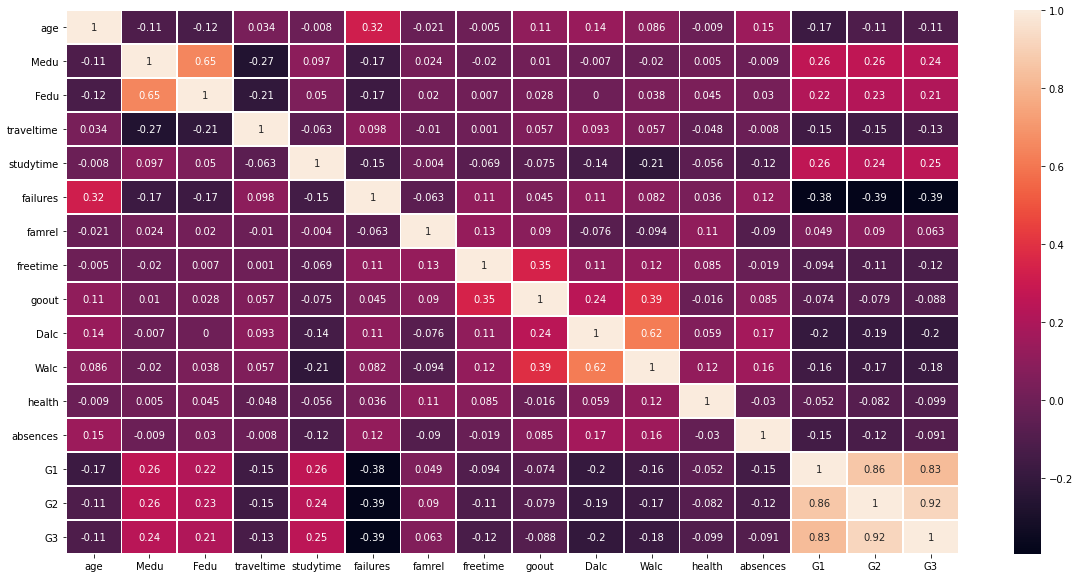

In [ ]:
corr = student_port.corr(method='pearson').round(3)
plt.figure(figsize=[20,10])
sn.heatmap(corr, annot=True, linewidths=1)
plt.show()

- O diagrama mostrou que existe forte correlação entre `Dalc` e `Walc`, entre `G1`,`G2`,`G3` e `failures`, e `Medu` e `Fedu`.
- Portanto, vamos fazer a média entre `G1` (first period grade), `G2` (second period grade), `G3` (final grade), uma vez que representam as notas dos estudantes;
- E também calcular a média entre Medu e Fedu;
- Optamos por utilizar o `Dalc` para atributo alvo. Uma vez que se correlaciona com `Walc`, podemos desconsiderar este último.

Criamos a coluna `average` e atribuimos a ela a média entre as notas (`G1`,`G2`, `G3`)

In [ ]:
student_port['average'] = student_port[['G1','G2', 'G3']].mean(axis=1)
student_port[['G1','G2','G3','average']].head()

,G1,G2,G3,average
0,0,11,11,7.333333
1,9,11,11,10.333333
2,12,13,12,12.333333
3,14,14,14,14.000000
4,11,13,13,12.333333


Com a média feita, podemos retirar as colunas de notas (`G1`,`G2`, `G3`) e também `failures` que é muito correlata com as notas.


In [ ]:
student_port.drop(columns=['failures','G1','G2','G3'], inplace=True)
student_port.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'average'],
      dtype='object')

Criamos a coluna `Pedu` (Parents Education) e atribuímos a ela a média entre `Fedu` e `Medu`e podamos estas duas colunas


In [ ]:
student_port['Pedu'] = student_port[['Fedu','Medu']].mean(axis=1)
student_port.drop(columns=['Fedu', 'Medu'], inplace=True)

In [ ]:
student_port['Dalc'].value_counts()

1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

In [ ]:
student_port['Walc'].value_counts()

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

Verificamos a ocorrência dos casos categóricos em `Dalc` e `Walc` e optamos pela coluna alvo `Dalc`. Com isso, podemos podar a coluna `Walc`

In [ ]:
student_port.drop(columns=['Walc'], inplace=True)

Optamos por transformar os valores da coluna `Dalc` para uma relação binária. Como `Dalc` se trata do consumo de alcool em dias úteis e o dataset nos dá uma categorização de 1 a 5 (sendo 1 pouco consumo e 5 muito), categorizamos para:
* 0: Não preocupante, sem necessidade de intervenção.
* 1: Preocupante, necessária intervenção.

In [ ]:
target = 'Dalc'

In [ ]:
student_port[target] = ['Preocupante' if v >= 3 else 'Não preocupante' for v in student_port[target]]
student_port[target].value_counts()

Não preocupante    572
Preocupante         77
Name: Dalc, dtype: int64

Transformamos também, atributos categóricos em numéricos. Por exemplo `sex` que tinha valores F ou M, substituimos por 0 ou 1.

In [ ]:
categoric_columns = student_port.select_dtypes(np.object).columns
encoders = dict.fromkeys(categoric_columns)
for encoder in encoders.keys():
    encoders[encoder] = LabelEncoder()
    encoders[encoder].fit(student_port[encoder].unique())
    student_port[encoder] = encoders[encoder].transform(student_port[encoder])
student_port.head()

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,average,Pedu
0,0,0,18,1,0,0,0,4,0,1,2,2,1,0,0,0,1,1,0,0,4,3,4,0,3,4,7.333333,4.0
1,0,0,17,1,0,1,0,2,0,0,1,2,0,1,0,0,0,1,1,0,5,3,3,0,3,2,10.333333,1.0
2,0,0,15,1,1,1,0,2,2,1,1,2,1,0,0,0,1,1,1,0,4,3,2,0,3,6,12.333333,1.0
3,0,0,15,1,0,1,1,3,1,1,1,3,0,1,0,1,1,1,1,1,3,2,2,0,5,0,14.000000,3.0
4,0,0,16,1,0,1,2,2,1,0,1,2,0,1,0,0,1,1,0,0,4,3,2,0,5,0,12.333333,3.0


## Modelos

Função criada para manipular o retorno da função classification_report(), formatando para uma saída mais legível.


In [ ]:
def print_report(report):
  df = pd.DataFrame(
      [
       [f"{metric:.3f}" for _, metric in v.items()] for k, v in report.items() if k in ["0", "1", "macro avg", "weighted avg"]
      ],
      columns=["precision", "recall", "f1-score", "support"], 
      index=[k for k, _ in report.items() if k in ["0", "1", "macro avg", "weighted avg"]]
  )
  acuracia = report["accuracy"]
  
  return df, acuracia

Criamos em X, uma lista de listas, que contêm todos os valores da tabela, com exceção da coluna `Dalc`. Já em Y armazenamos os respectivos valores do atributo `Dalc` de todos os estudantes.

Dividimos os dados com _holdout_ estratificado (ou seja, respeitando a proporção de cada classe): 90% da base servirá para treino e 10% para teste.

In [ ]:
X,Y = student_port.drop(columns=[target]).values, student_port[target].values
dados_treino, dados_teste, classe_treino, classe_teste = train_test_split(X, Y,
                                            test_size = 0.1,
                                            random_state=42,
                                            stratify=Y)

### Árvore de decisão

Aqui utilizamos a árvore de decisão pra classificação `DecisionTreeClassifier` com o parâmetro `class_weight`, pois as classes não são balanceadas na base de dados

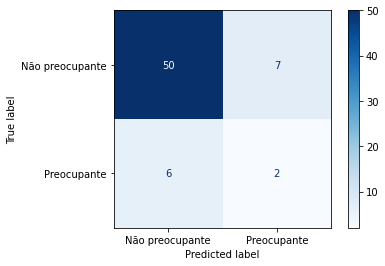

In [ ]:
dtc = DecisionTreeClassifier(class_weight="balanced")
dtc.fit(dados_treino, classe_treino)
classe_pred = dtc.predict(dados_teste)
cm = plot_confusion_matrix(dtc, dados_teste, classe_teste, cmap=plt.cm.Blues, 
                               display_labels=encoders[target].classes_)
plt.show()

In [ ]:
r_dtc, a = print_report(classification_report(classe_teste, classe_pred, output_dict=True))
print(f'Acurácia {a}')
r_dtc

Acurácia 0.8


,precision,recall,f1-score,support
0,0.893,0.877,0.885,57.000
1,0.222,0.250,0.235,8.000
macro avg,0.558,0.564,0.560,65.000
weighted avg,0.810,0.800,0.805,65.000


### Naive Bayes

Aqui utilizamos o Complement Naive Bayes, que é usado para classes não-balanceadas.

Declaramos `gnb` como nosso objeto `ComplementNB` (Complement Naive Bayes), treinamos o modelo com o método .fit da classe `ComplementNB` e predizemos os `dados_teste` e a partir dele, geramos a matriz de confusão e o report, para analisar a acurácia e as demais métricas.

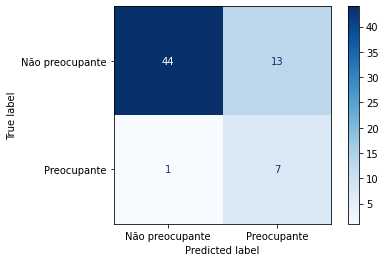

Acurácia: 0.7846153846153846


,precision,recall,f1-score,support
0,0.978,0.772,0.863,57.000
1,0.350,0.875,0.500,8.000
macro avg,0.664,0.823,0.681,65.000
weighted avg,0.901,0.785,0.818,65.000


In [ ]:
gnb = ComplementNB()
classe_pred = gnb.fit(dados_treino, classe_treino).predict(dados_teste)

plot_confusion_matrix(gnb, dados_teste, classe_teste, cmap=plt.cm.Blues, 
                               display_labels=encoders[target].classes_)
plt.show()
report = classification_report(classe_teste, classe_pred, output_dict=True)
r_nb, acuracia = print_report(report)
print(f'Acurácia: {acuracia}')
r_nb

###SVM

Para o SVM, utilizaremos o mesmo `X`, `Y` definidos acima e com isso, a mesma separação de `dados_treino`, `dados_teste`, `classe_treino` e `classe_teste`

Começamos definindo o objeto `svc` (C-Support Vector Classification) e o utilizamos para gerar a `classe_pred` com o método `.fit` do mesmo. 
Com essas variáveis definidas, podemos plotar a matriz de confusão do modelo e gerar o report.

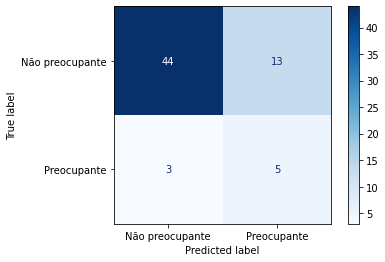

Acurácia: 0.7538461538461538


,precision,recall,f1-score,support
0,0.936,0.772,0.846,57.000
1,0.278,0.625,0.385,8.000
macro avg,0.607,0.698,0.615,65.000
weighted avg,0.855,0.754,0.789,65.000


In [ ]:
svc = SVC(class_weight="balanced", random_state=42)
classe_pred = svc.fit(dados_treino, classe_treino).predict(dados_teste)

plot_confusion_matrix(svc, dados_teste, classe_teste, cmap=plt.cm.Blues, 
                               display_labels=encoders[target].classes_)
plt.show()
report = classification_report(classe_teste, classe_pred, output_dict=True)
r_svc, acuracia = print_report(report)
print(f'Acurácia: {acuracia}')
r_svc

### Resumo

In [ ]:
pd.DataFrame(
    [
        [r[col].iloc[0] for col in ['precision', 'recall']] + [r[col].iloc[1] for col in ['precision', 'recall']] for r in [r_dtc, r_nb, r_svc]
    ],
    columns=[f'Não preocupante: {m}' for m in ['Precisão', 'Revocação']] + [f'Preocupante: {m}' for m in ['Precisão', 'Revocação']],
    index=['Árvore de decisão', 'Naive-Bayes', 'SVM']
).transpose()

,Árvore de decisão,Naive-Bayes,SVM
Não preocupante: Precisão,0.893,0.978,0.936
Não preocupante: Revocação,0.877,0.772,0.772
Preocupante: Precisão,0.222,0.350,0.278
Preocupante: Revocação,0.250,0.875,0.625


## Oversampling e Undersampling

Devido ao alto nível de desbalançeamento das classe, também optamos por usar duas técnicas que visam minimizar o desbalançeamento. Utilizamos o SMOTE (Synthetic Minority Oversampling Technique) que cria novos exemplos da classe minoritária  apartir dos exemplos existentes; e o _Edited Neares Neighbour_ que retira exemplos que seriam erroneamente classificados pelos vizinhos mais próximos.

In [ ]:
print('Original dataset shape %s' % Counter(classe_treino))
sme = SMOTEENN(random_state=42)
dados_treino_res, classe_treino_res = sme.fit_resample(dados_treino,classe_treino)
print('Resampled dataset shape %s' % Counter(classe_treino_res))

Original dataset shape Counter({0: 515, 1: 69})
Resampled dataset shape Counter({1: 513, 0: 244})


Em seguida, foram testados dois dos modelos utilizados anteriormente: o Naive Bayes e o SVM.

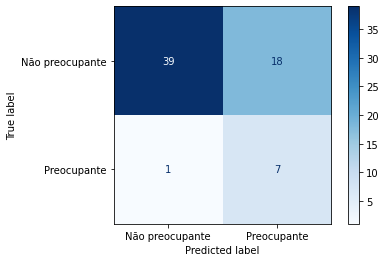

0.7076923076923077


,precision,recall,f1-score,support
0,0.975,0.684,0.804,57.000
1,0.280,0.875,0.424,8.000
macro avg,0.627,0.780,0.614,65.000
weighted avg,0.889,0.708,0.757,65.000


In [ ]:
gnb = ComplementNB()
classe_pred = gnb.fit(dados_treino_res, classe_treino_res).predict(dados_teste)

plot_confusion_matrix(gnb, dados_teste, classe_teste, cmap=plt.cm.Blues, 
                               display_labels=encoders[target].classes_)
plt.show()
report = classification_report(classe_teste, classe_pred, output_dict=True)
r_nb_smote, acuracia = print_report(report)
print(acuracia)
r_nb_smote

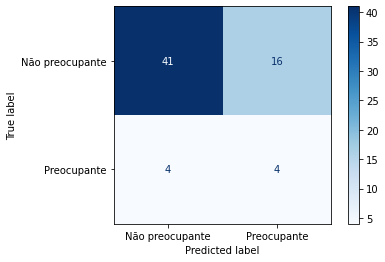

Acurácia: 0.6923076923076923


,precision,recall,f1-score,support
0,0.911,0.719,0.804,57.000
1,0.200,0.500,0.286,8.000
macro avg,0.556,0.610,0.545,65.000
weighted avg,0.824,0.692,0.740,65.000


In [ ]:
svc = SVC(class_weight="balanced", random_state=42)
classe_pred = svc.fit(dados_treino_res, classe_treino_res).predict(dados_teste)

plot_confusion_matrix(svc, dados_teste, classe_teste, cmap=plt.cm.Blues, 
                               display_labels=encoders[target].classes_)
plt.show()
report = classification_report(classe_teste, classe_pred, output_dict=True)
r_svc_smote, acuracia = print_report(report)
print(f'Acurácia: {acuracia}')
r_svc_smote

### Resumo

In [ ]:
pd.DataFrame(
    [
        [r[col].iloc[0] for col in ['precision', 'recall']] + [r[col].iloc[1] for col in ['precision', 'recall']] for r in [r_nb_smote, r_svc_smote]
    ],
    columns=[f'Não preocupante: {m}' for m in ['Precisão', 'Revocação']] + [f'Preocupante: {m}' for m in ['Precisão', 'Revocação']],
    index=['Naive-Bayes', 'SVM']
).transpose()

,Naive-Bayes,SVM
Não preocupante: Precisão,0.975,0.911
Não preocupante: Revocação,0.684,0.719
Preocupante: Precisão,0.280,0.200
Preocupante: Revocação,0.875,0.500


## Conclusão




*   É importante selecionar um modelo com uma revocação alta.
*   Seria menos alarmante um cenário onde identificamos incorretamente adolescentes com a classe preocupante mas identificamos todos os alunos que realmente possuem um nível preocupante de consumo alcoólico ao longo da semana.
* O modelo com o melhor desempenho foi o Naive Bayes, com uma revocação de 0.875 e uma acurácia de aproximadamente 0.753 e a maior precisão para a classe "não preocupante".
* No geral todos os modelos não obtiveram uma precisão alta para a classe "preocupante". Isso se deve ao fato do aspecto desbalanceado do conjunto de dados no que se refere ao atributo alvo Dalc.
* As tentativas de combinar métodos de Undesampling e Oversampling também não trouxeram diferenças consideráveis, apesar de serem técnicas para tratar datasets desbalanceados.
* Talvez a existência de um dataset com mais exemplos reais da classe "não preocupante" e um total maior de exemplos seriam fatores que influenciariam positivamente na obtenção de um classificador mais eficiente.
* A escolha de Dalc como atributo-alvo também influenicou nos resultados dos modelos. Caso fossem utilizados outros atributos como atributo-alvo, poderia haver um melhor balanceamento entre as classes.



